# Data Analysis for Software Engineers

## Pandas Tutorual (Russian Version)
### and a little of sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# Pandas
## Основные структуры

Модуль `pandas` существенно упрощает исследование табличных данных в `python`. Работа в нем во многом напоминает работу с таблицами в SQL с тем отличием, что в `pandas` ~~тебе не хочется рвать волосы на голове~~ это делать гораздо удобнее, и в нем заложены некоторые дополнительные инструменты по работе с данными.

### Series

Основными структурами являются `Series` и `DataFrame`. <br/>
`Series` – это проиндексированный одномерный массив значений. Он представляет из себя некий компромис между массивами `numpy` и простым словарем `dict`.

Задать `Series` можно многими способами, например с помощью массива:

In [2]:
ser = pd.Series(np.random.rand(5))

In [3]:
ser

0    0.282700
1    0.657466
2    0.815877
3    0.560242
4    0.593699
dtype: float64

Колонка слева - это (строчный) индекс - некоторая нумерация записанных значений

In [4]:
ser.index

RangeIndex(start=0, stop=5, step=1)

In [5]:
ser.values

array([0.28269953, 0.65746624, 0.81587686, 0.56024201, 0.59369935])

In [6]:
# Достучаться до одного значения можно так
ser[1]

0.6574662426670834

In [7]:
# Можно так - это обычная интервальная индексация в python.
ser[0:2]

0    0.282700
1    0.657466
dtype: float64

Но про то, как улучше находить нужные вам значения - чуть позже.

Индексом может быть что угодно, например:

In [8]:
ser = pd.Series(np.random.rand(8), index=['s', 'o', 'f', 't', 'w', 'a', 'r', 'e'])

In [9]:
ser

s    0.328619
o    0.059063
f    0.213987
t    0.898326
w    0.384855
a    0.899803
r    0.040301
e    0.038951
dtype: float64

In [10]:
ser['s']

0.328619254117664

In [11]:
ser['o':'t']

o    0.059063
f    0.213987
t    0.898326
dtype: float64

### Индексация

Индексация в `pandas` может временами может показаться запутанной

In [12]:
ser = pd.Series(np.random.rand(5), index=[1,3,5,6,9])
ser

1    0.629203
3    0.194886
5    0.008818
6    0.798149
9    0.529239
dtype: float64

In [13]:
ser[3]

0.19488617662950203

In [14]:
ser[3:5] #?!

6    0.798149
9    0.529239
dtype: float64

Поэтому придумали разные операторы для индексирования, чтобы можно было явно указать, когда вы хотите использовать значения индекса, а когда позицию.

In [15]:
ser.loc[3:5, ]

3    0.194886
5    0.008818
dtype: float64

In [16]:
ser.loc[:, ]

1    0.629203
3    0.194886
5    0.008818
6    0.798149
9    0.529239
dtype: float64

In [17]:
idx = ser > 0.5
ser.loc[idx, ]

1    0.629203
6    0.798149
9    0.529239
dtype: float64

In [18]:
ser.iloc[3:5, ]

6    0.798149
9    0.529239
dtype: float64

Их же используйте для присваивания!!

In [19]:
idx = ser > 0.5
ser.loc[idx, ] = 0.5
ser

1    0.500000
3    0.194886
5    0.008818
6    0.500000
9    0.500000
dtype: float64

### DataFrame

`DataFrame` — это проиндексированный многомерный массив значений, соответственно каждый столбец `DataFrame`, является структурой `Series`. Индексирование в `DataFrame` ровно тоже, что и в `Series`, с тем отличием, что добавляется второе измерение.

In [20]:
df = pd.DataFrame(np.random.randn(10, 3),
                  index=range(10),
                  columns=['A', 'B', 'C'])

In [21]:
df.head() # выводит первые 5 (по-умолчанию) строк таблицы

,A,B,C
0,-0.198499,-0.549335,1.491721
1,1.057013,1.156193,1.236436
2,-3.077846,1.217349,0.961415
3,-0.508836,-0.972389,-1.832161
4,-0.652980,-0.947808,-0.680339


In [22]:
print df.index
print df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')
Index([u'A', u'B', u'C'], dtype='object')


In [23]:
df.loc[1:3, ['A', 'B']]

,A,B
1,1.057013,1.156193
2,-3.077846,1.217349
3,-0.508836,-0.972389


In [24]:
df.iloc[1:3, 0:2]

,A,B
1,1.057013,1.156193
2,-3.077846,1.217349


`DataFrame` тоже можно транспонировать!

In [25]:
df.T

,0,1,2,3,4,5,6,7,8,9
A,-0.198499,1.057013,-3.077846,-0.508836,-0.652980,-0.122589,-1.156552,0.672465,-0.997905,-0.447743
B,-0.549335,1.156193,1.217349,-0.972389,-0.947808,0.037656,-0.159291,-0.483673,0.189135,-0.056769
C,1.491721,1.236436,0.961415,-1.832161,-0.680339,0.305657,-0.942550,0.714127,-2.287526,0.535557


In [26]:
# Краткая описательная статистика
df.describe() 

# Кстати, это тоже DataFrame

,A,B,C
count,10.000000,10.000000,10.000000
mean,-0.543347,-0.056893,-0.049766
std,1.123684,0.762432,1.311684
min,-3.077846,-0.972389,-2.287526
25%,-0.911674,-0.532919,-0.876997
50%,-0.478289,-0.108030,0.420607
75%,-0.141567,0.151265,0.899593
max,1.057013,1.217349,1.491721


Аггрегация в DataFrame (по-умолчанию) происходит по стоблцам

In [27]:
df.mean()

A   -0.543347
B   -0.056893
C   -0.049766
dtype: float64

In [28]:
df.A.mean()

-0.5433471575468143

Перевод данных в нужный тип

In [29]:
df.A = df.A.astype(int)
df.head()

,A,B,C
0,0,-0.549335,1.491721
1,1,1.156193,1.236436
2,-3,1.217349,0.961415
3,0,-0.972389,-1.832161
4,0,-0.947808,-0.680339


In [30]:
print 'Количество уникальных значений в столбце А = %d' % df.A.nunique()

Количество уникальных значений в столбце А = 4


In [31]:
print 'Самые большие значения в стоблце B :'
print df.B.nlargest(2)

# Гораздо быстрее, чем df.B.sort(ascending=False).iloc[:2]

Самые большие значения в стоблце B :
2    1.217349
1    1.156193
Name: B, dtype: float64


Важно следить за данными, которые у вас хранятся в `DataFrame`

In [32]:
df.dtypes

A      int64
B    float64
C    float64
dtype: object

In [33]:
df.loc[0, 'A'] = 'lalaley'
df.head()

,A,B,C
0,lalaley,-0.549335,1.491721
1,1,1.156193,1.236436
2,-3,1.217349,0.961415
3,0,-0.972389,-1.832161
4,0,-0.947808,-0.680339


In [34]:
df.A

0    lalaley
1          1
2         -3
3          0
4          0
5          0
6         -1
7          0
8          0
9          0
Name: A, dtype: object

Удаление\добавление строк\столбцов

In [35]:
df.head()

,A,B,C
0,lalaley,-0.549335,1.491721
1,1,1.156193,1.236436
2,-3,1.217349,0.961415
3,0,-0.972389,-1.832161
4,0,-0.947808,-0.680339


In [36]:
df.drop(0, axis=0)
# Пока df не изменился !

,A,B,C
1,1,1.156193,1.236436
2,-3,1.217349,0.961415
3,0,-0.972389,-1.832161
4,0,-0.947808,-0.680339
5,0,0.037656,0.305657
6,-1,-0.159291,-0.942550
7,0,-0.483673,0.714127
8,0,0.189135,-2.287526
9,0,-0.056769,0.535557


In [37]:
df.drop('A', axis=1)

,B,C
0,-0.549335,1.491721
1,1.156193,1.236436
2,1.217349,0.961415
3,-0.972389,-1.832161
4,-0.947808,-0.680339
5,0.037656,0.305657
6,-0.159291,-0.942550
7,-0.483673,0.714127
8,0.189135,-2.287526
9,-0.056769,0.535557


In [38]:
df.loc[:, 'D'] = np.nan
df.head()

,A,B,C,D
0,lalaley,-0.549335,1.491721,NaN
1,1,1.156193,1.236436,NaN
2,-3,1.217349,0.961415,NaN
3,0,-0.972389,-1.832161,NaN
4,0,-0.947808,-0.680339,NaN


In [39]:
df.loc[10, :] = 0
df.tail()

,A,B,C,D
6,-1,-0.159291,-0.942550,NaN
7,0,-0.483673,0.714127,NaN
8,0,0.189135,-2.287526,NaN
9,0,-0.056769,0.535557,NaN
10,0,0.000000,0.000000,0.0


## Продолжим обучение Pandas на реальных данных

### Удотребление ЛСД и успеваемость

В 1968 году была [опубликована](http://www.ncbi.nlm.nih.gov/pubmed/5676802) статья под интригующем названием Correlation of Performance Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in Human Subjects.

К статье приложен небольшой набор [данных](https://www.dropbox.com/s/ui14yeeckbc6z7c/drugs-and-math.csv?dl=0), состоящий из 7 наблюдений

In [40]:
df = pd.read_csv('drugs-and-math.csv', 
                 index_col=0, 
                 sep=',')

In [41]:
df.head()

,Drugs,Score
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65


In [42]:
print df.shape
print df.columns
print df.index

(7, 2)
Index([u'Drugs', u'Score'], dtype='object')
Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')


Таблица уже отсортирована по колонке Drugs - отсортируем по колонке Score

In [43]:
df = df.sort_values('Score', 
                    ascending=False)

In [44]:
df.head()

,Drugs,Score
0,1.17,78.93
2,3.26,67.47
1,2.97,58.20
4,5.83,45.65
3,4.69,37.47


In [45]:
df.describe().T # Иногда так лучше

,count,mean,std,min,25%,50%,75%,max
Drugs,7.0,4.332857,1.935413,1.17,3.115,4.69,5.915,6.41
Score,7.0,50.087143,18.610854,29.97,35.195,45.65,62.835,78.93


/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'Verdana'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


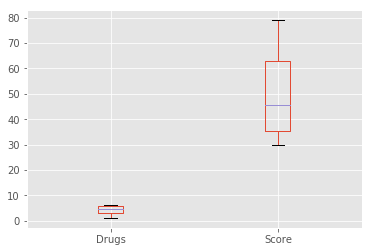

In [46]:
df.plot(kind='box');

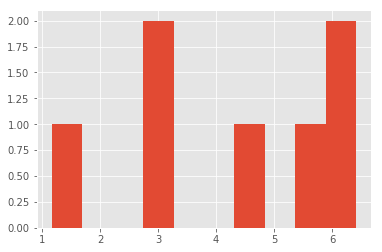

In [47]:
df.Drugs.hist();

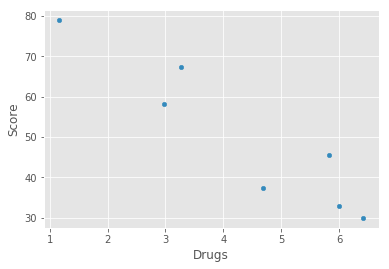

In [48]:
# df.plot(x='Drugs', y='Score')
df.plot(x='Drugs', y='Score', kind='scatter');

Мы явно видим тенденцию..

### Рождаемость в США (2 балла)

Загрузите два набора данных с информацией о рождаемости в США: [Набор 1](https://www.dropbox.com/s/4v743y3e25lz0an/US_births_1994-2003_CDC_NCHS.csv?dl=0), [Набор 2](https://www.dropbox.com/s/3aoulbiuomamay6/US_births_2000-2014_SSA.csv?dl=0)

In [49]:
df1 = pd.read_csv('US_births_1994-2003_CDC_NCHS.csv')
df2 = pd.read_csv('US_births_2000-2014_SSA.csv')

`Pandas` обладает мощным функционалом для работы с временными рядами. Самое главное, пожалуй правильно задать столбец с датой в DataFrame. Вернемся к данным:

In [50]:
df1.head()

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


Функция `pd.to_datetime()` преобразовывать сырые данные с специальный тип Timestamp. Делать это можно одним из нескольких способов:
* Задан столбец, в котором дата записана в виде строчки произвольного формата (например 2016-03-01, 01032016, 01.03.16 ...)
    
    В этом случае вам надо указать в `pd.to_datetime()` [формат](http://strftime.org/) даты


In [51]:
print pd.to_datetime('2016-03-01', format='%Y-%m-%d')
print pd.to_datetime('01032016', format='%d%m%Y')
print pd.to_datetime('01-mar-2016', format='%d-%b-%Y')

2016-03-01 00:00:00
2016-03-01 00:00:00
2016-03-01 00:00:00


* Задано несколько столбцов, скаждый из которых содержит элемент даты (столбец под день, месяц, год)

    Тогда, `pd.to_datetime()` подается 3 столбца из таблицы, которые должны **обязательно** именоваться `['year', 'month', 'day']`

In [52]:
# переименовываем столбец
df1 = df1.rename(columns={'date_of_month': 'day'})

df1.loc[:, 'date'] = \
pd.to_datetime(df1.loc[:, ['year', 'month', 'day']])
df1.head()

,year,month,day,day_of_week,births,date
0,1994,1,1,6,8096,1994-01-01
1,1994,1,2,7,7772,1994-01-02
2,1994,1,3,1,10142,1994-01-03
3,1994,1,4,2,11248,1994-01-04
4,1994,1,5,3,11053,1994-01-05


Довольно часто информация о дате передается в формате [unix-timestamp](http://www.onlineconversion.com/unix_time.htm).

В этом случае можно воспользоваться функцией `pd.Timestamp.fromtimestamp()`

In [53]:
pd.Timestamp.fromtimestamp(1453766400)

Timestamp('2016-01-26 03:00:00')

Давайте сделаем дату индексом в нашей таблице.

In [54]:
df1 = df1.set_index('date')
df1.head()

,year,month,day,day_of_week,births
date,,,,,
1994-01-01,1994,1,1,6,8096
1994-01-02,1994,1,2,7,7772
1994-01-03,1994,1,3,1,10142
1994-01-04,1994,1,4,2,11248
1994-01-05,1994,1,5,3,11053


In [55]:
df1

,year,month,day,day_of_week,births
date,,,,,
1994-01-01,1994,1,1,6,8096
1994-01-02,1994,1,2,7,7772
1994-01-03,1994,1,3,1,10142
1994-01-04,1994,1,4,2,11248
1994-01-05,1994,1,5,3,11053
1994-01-06,1994,1,6,4,11406
1994-01-07,1994,1,7,5,11251
1994-01-08,1994,1,8,6,8653
1994-01-09,1994,1,9,7,7910


Это дает нам возможность выбирать строчки по нужным датам...

In [56]:
df1.loc['1994-01-01', :]

year           1994
month             1
day               1
day_of_week       6
births         8096
Name: 1994-01-01 00:00:00, dtype: int64

In [57]:
df1.loc['1994-01-01':'1995-01-01', :]

,year,month,day,day_of_week,births
date,,,,,
1994-01-01,1994,1,1,6,8096
1994-01-02,1994,1,2,7,7772
1994-01-03,1994,1,3,1,10142
1994-01-04,1994,1,4,2,11248
1994-01-05,1994,1,5,3,11053
1994-01-06,1994,1,6,4,11406
1994-01-07,1994,1,7,5,11251
1994-01-08,1994,1,8,6,8653
1994-01-09,1994,1,9,7,7910


.. и не только, например

In [58]:
# Аггрегация с нужной частотой
df_aggr = df1.resample(rule='AS')\
             .sum()

In [59]:
df_aggr.head()

,year,month,day,day_of_week,births
date,,,,,
1994-01-01,727810,2382,5738,1462,3952767
1995-01-01,728175,2382,5738,1463,3899589
1996-01-01,730536,2384,5767,1459,3891494
1997-01-01,728905,2382,5738,1459,3880894
1998-01-01,729270,2382,5738,1460,3941553


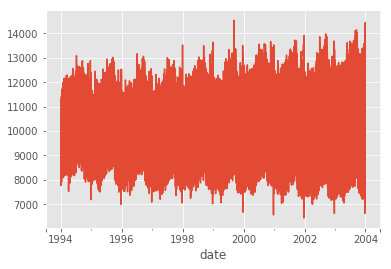

In [60]:
# Визуализация
df1.births.plot(label=u'Исходный ряд');

**Задание**<br/>
Преобразуйте дату в таблице df2 аналогично df1. Становится ясно, что периоды данных в этих файлах пересекаются.

Необходимо проверить, что показатели рождаемости слабо отличаются между двумя файлами.

Сравните показатели рождаемости на датах на общих датах

In [61]:
df2.head()

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558


#### Преобразовываем дату.

In [62]:
df2 = df2.rename(columns={'date_of_month': 'day'})

df2.loc[:, 'date'] = pd.to_datetime(df2.loc[:, ['year', 'month', 'day']])
df2 = df2.set_index('date')
df2.head()

,year,month,day,day_of_week,births
date,,,,,
2000-01-01,2000,1,1,6,9083
2000-01-02,2000,1,2,7,8006
2000-01-03,2000,1,3,1,11363
2000-01-04,2000,1,4,2,13032
2000-01-05,2000,1,5,3,12558


#### Объединяем датафреймы по общей дате

In [63]:
df1.reset_index(inplace=True)
df2.reset_index(inplace=True)

In [64]:
df12 = pd.merge(df1, df2, on=['date'], how='inner')
df12 = df12.set_index('date')
df12 = df12.drop(['year_y', 'month_y', 'day_y', 'day_of_week_y'], axis=1)
df12 = df12.rename(columns={'year_x': 'year', 
                            'month_x': 'month',
                            'day_x': 'day',
                            'day_of_week_x': 'day_of_week'})
df12.head()

,year,month,day,day_of_week,births_x,births_y
date,,,,,,
2000-01-01,2000,1,1,6,8843,9083
2000-01-02,2000,1,2,7,7816,8006
2000-01-03,2000,1,3,1,11123,11363
2000-01-04,2000,1,4,2,12703,13032
2000-01-05,2000,1,5,3,12240,12558


#### Получили датасет с рождаемостью для одинаковых дат
Найдём дельту, разницу между births_x и births_y. Посмотрим на неё и скажем насколько она велика.

In [65]:
df12['diff'] = np.abs(df12['births_x'] - df12['births_y'])
print 'Максимальная разница в рождаемости одной даты в разных файлах -- %d' %np.max(df12['diff'])

Максимальная разница в рождаемости одной даты в разных файлах -- 438


**Задание**<br/>
Теперь надо аккуратно объединить таблицы, так чтобы соблюсти целостность информации (то есть чтобы на одну дату было по одному наблюдению - из одной из таблиц или среднее по обеим)

**HINT**
`join`, `concat`

Используем прошлую таблицу: считаем средний birth у дубликатов, создаем новую колонку и дропаем старые.

Затем, конкатинируем 2 старые таблицы, дропаем дубликаты, конкатинируем с полученной ранее таблицей, сортируем по дате.

In [66]:
df_common = df12.copy()
df_common['births'] = (df_common['births_x'] + df_common['births_y']) // 2
df_common.drop(columns=['births_x', 'births_y', 'diff'], inplace=True)
df_common.head()

,year,month,day,day_of_week,births
date,,,,,
2000-01-01,2000,1,1,6,8963
2000-01-02,2000,1,2,7,7911
2000-01-03,2000,1,3,1,11243
2000-01-04,2000,1,4,2,12867
2000-01-05,2000,1,5,3,12399


In [67]:
df_concated = pd.concat([df1, df2], ignore_index=True)
df_concated = df_concated.drop_duplicates(subset='date', keep=False)
df_concated = df_concated.set_index('date')
# df_concated.drop(columns=['index'], inplace=True)
df_concated.head()

,year,month,day,day_of_week,births
date,,,,,
1994-01-01,1994,1,1,6,8096
1994-01-02,1994,1,2,7,7772
1994-01-03,1994,1,3,1,10142
1994-01-04,1994,1,4,2,11248
1994-01-05,1994,1,5,3,11053


In [68]:
well_merged = pd.concat([df_concated, df_common])
well_merged.sort_index(inplace=True)

In [69]:
well_merged.head()

,year,month,day,day_of_week,births
date,,,,,
1994-01-01,1994,1,1,6,8096
1994-01-02,1994,1,2,7,7772
1994-01-03,1994,1,3,1,10142
1994-01-04,1994,1,4,2,11248
1994-01-05,1994,1,5,3,11053


In [70]:
well_merged.shape

(7670, 5)

### Качество вина (2 балла)

Загрузите [датасет](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) с информацией о характеристиках вина и его качестве.

In [71]:
df = pd.read_csv('winequality-red.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Задание**<br/>
* Что из себя представляет объект в этом наборе данных? Сколько их?
* Какие признаки описывают объекты? Сколько их?
* Какой признак является целевым?
* Каковы их области значений?
* Есть ли пропуски?

---
* Каждый объект - это один из образцов красного вина
* Признаки, такие как _fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates и alcohol_ описывают образцы красного вина. Эти признаки - вычисленные показатели кислотности, концетрации спирта, и других химических свойств красного вина
* Целевой признак - quality. Это метрика от 1 до 10, показывающая насколько хорош (относительно эталонных показателей) данный образец красного вина
* Об областях значений можно судить только по конкретному датафрейму. Например, из метода df.describe() можно получить эту информацию -- min и max на каждом признаке и дадут возможный диапазон значений. Конечно, я поискал в интернете про этот датасет, чтобы узнать настоящие области значений. В исходном [источнике](https://archive.ics.uci.edu/ml/datasets/Wine+Quality), откуда и был скачан дадасет, ни слова о возможных значениях (только о quality). Есть еще датасет для белого вина, но в рамках данного задания он не рассматривается
* Пропусков нет (см. клетку ниже)

In [72]:
print 'Есть ли пропуски? %s' %(True in df.isna())
df.describe()

Есть ли пропуски? False


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Задание**<br/>
Какие признаки больше всего влияют на целевую переменную?

Признаки, имеющие наибольшие значения, больше всего влияют на целевую переменную. <br/>
Найдём признаки с наибольшим значением.

In [73]:
df.mean().sort_values(ascending=False)

total sulfur dioxide    46.467792
free sulfur dioxide     15.874922
alcohol                 10.422983
fixed acidity            8.319637
quality                  5.636023
pH                       3.311113
residual sugar           2.538806
density                  0.996747
sulphates                0.658149
volatile acidity         0.527821
citric acid              0.270976
chlorides                0.087467
dtype: float64

Видно, что показатели _total sulfur dioxide, free sulfur dioxide, alcohol_ - топ три по magnitude для целевой переменной.

# Заключение
Естественно, за сегодня мы не разобрали все. Мы очень ограничены во времени и естественно, чтобы стать гуру pandas и numpy нужно постоянно практиковаться, использовать инструмент в повседневных задачах.

**Полезные ссылки**
* [Видеолекции про pandas](http://www.dataschool.io/easier-data-analysis-with-pandas/)
* [Свод туториалов по эффективному использованию pandas](https://github.com/TomAugspurger/modern-pandas)
* [Cheat-sheet](https://www.dropbox.com/s/4eauvhj5tyk3r83/Quandl%2B_%2BPandas%2C%2BSciPy%2C%2BNumPy%2BCheat%2BSheet.pdf?dl=0)

# Имплементация собственного метода

Для решения задач вида "имплементируйте метод X" крайне желательно (но необязательно) реализовывать методы с помощью интерфейса sklearn. Ниже вы увидите пример очень простого **классификатора**. 

Используем все тот же датасет с вином

In [74]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [75]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Наша задача состоит в предсказании целевого признака `quality` по остальным признакам. `quality` - это вещественная переменная (оценка качества от 0 до 10). Мы будем решать упрощенную задачу - со столбцом `quality_cat` по следующим правилам:

* `quality_cat = 1` если `quality > 5` 
* `quality_cat = 0` - иначе 

Таким образом, `quality_cat` характерует "плохое" и "хорошее" вино.

In [76]:
def prepocess_wine(df):
    df.loc[:, 'quality_cat'] = (df.loc[:, 'quality'] > 5).astype(int)
    df = df.drop('quality', axis=1)
    
    return df

In [77]:
df_wine = df_wine.pipe(prepocess_wine)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


Нарисуем распределение хорошего и плохого вина по признаку `alcohol`.

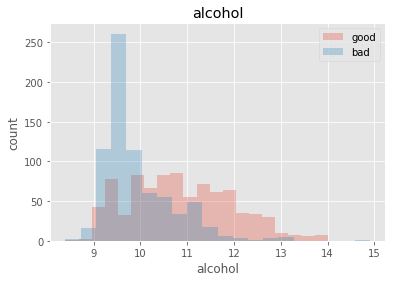

In [78]:
_, ax = plt.subplots(1,1)
df_wine.query('quality_cat == 1').hist('alcohol', alpha=0.3, bins=20, label='good', ax=ax)
df_wine.query('quality_cat == 0').hist('alcohol', alpha=0.3, bins=20, label='bad', ax=ax)
ax.set_xlabel('alcohol')
ax.set_ylabel('count')
plt.legend()

Визуально кажется, что можно найти некоторое пороговое значение признака `alcohol` $\theta$, чтобы хорошо дискриминировать между плохими и хорошим вином:
* Если `alcohol >` $\theta$ - то предсказываем, что вино хорошее
* Если `alcohol <=` $\theta$ - то предсказываем, что вино плохое

Обучаеть классификатор будем очень просто: перебирать значения признака alchol и считать **ошибку** классификации. То значение, где ошибка минимальна и будет оптимальным.

Разделим целевой признак от остальных признаков

In [79]:
X, y = df_wine.iloc[:, :-1].values, df_wine.iloc[:, -1].values

Далее вы увидете пример реализации этого простого классификатора.

In [80]:
from sklearn.base import BaseEstimator, ClassifierMixin

class SimpleClassifier(BaseEstimator, ClassifierMixin): 
    
    def __init__(self):
        """
        Инициализация метода
        """
        
        self.threshold = 0

    def fit(self, X, y=None):
        """
        Выполняет процедуру обучения классификатора. В данном случае - перебор занчения признака alcohol.
        Договоримся, что признак alcohol будет в последнем столбце матрицы X
        """
        
        alcohol = X[:,-1]
        n = float(y.shape[0])
        
        # Задаем пространство поиска
        alco_range = np.arange(alcohol.min(), alcohol.max(), 0.1)
        
        min_error_rate = 1
                
        #  Начинаем поиск
        for theta in alco_range:
            prediction = alcohol > theta
            
            error_rate = sum(prediction != y)/n
            
            if error_rate < min_error_rate:
                min_error_rate = error_rate
                self.threshold = theta  
        
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания класса по обученному порогу
        """
        
        return (X[:,-1] > self.threshold).astype(int)

Обучаем модель

In [81]:
model = SimpleClassifier()
model.fit(X, y)

print 'Оптимальный порог: %f' % model.threshold

Оптимальный порог: 10.000000


Получаем предсказание модели (на обучающей выборке)

In [82]:
y_hat = model.predict(X)

Оценим долю ошибок на обучающей выборке

In [83]:
error_rate = sum(y_hat != y)/float(y.shape[0])
print 'Доля ошибок на обучающей выборке: %f' % error_rate

Доля ошибок на обучающей выборке: 0.295184


## Проверка метода на другой выборке

Мы обучили наш метод на данных о красном виде. 

Посмотрим, выполняется ли так же хорошо закономерность между качеством и уровнем алкоголя в белом вине.

In [84]:
df_wine_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
                           sep=';')

df_wine_test = df_wine_test.pipe(prepocess_wine)
df_wine_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_cat
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [85]:
X_test, y_test = df_wine_test.iloc[:, :-1].values, df_wine_test.iloc[:, -1].values
y_hat = model.predict(X_test)

In [86]:
error_rate = sum(y_hat != y_test)/float(y_test.shape[0])
print 'Доля ошибок на контрольной выборке: %f' % error_rate

Доля ошибок на контрольной выборке: 0.312577
